# Phase1_Data_Exploration

**Course:** SWE 485  
**Notebook:** Phase1_Data_Exploration.ipynb

## Dataset Goal & Source
- **Goal:** Analyze relationships between job titles and required skills for recommendation.
- **Source:** https://www.kaggle.com/datasets/batuhanmutlu/job-skill-set?resource=download

In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [2]:
# --- Load Dataset ---
# Change the file name if needed
DATA_PATH = "Dataset/jobs_dataset_raw.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Loaded: {DATA_PATH}")
except FileNotFoundError as e:
    raise FileNotFoundError(f"File not found: '{DATA_PATH}'. Please verify the name and folder.") from e

# Preview first 5 rows
df.head()

Loaded: Dataset/jobs_dataset_raw.csv


,job_id,category,job_title,job_description,job_skill_set
0,3902668440,HR,Sr Human Resource Generalist,SUMMARY\nTHE SR. HR GENERALIST PROVIDES HR EXP...,"['employee relations', 'talent acquisition', '..."
1,3905823748,HR,Human Resources Manager,BE PART OF A STELLAR TEAM AT YSB AS THE MANAGE...,"['Talent Acquisition', 'Employee Performance M..."
2,3905854799,HR,Director of Human Resources,OUR CLIENT IS A THRIVING ORGANIZATION OFFERING...,"['Human Resources Management', 'Recruitment', ..."
3,3905834061,HR,Chief Human Resources Officer,JOB TITLE: CHIEF HUMAN RESOURCES OFFICER (CHRO...,"['talent management', 'organizational developm..."
4,3906250451,HR,Human Resources Generalist (Hybrid Role),DESCRIPTION\n\n WHO WE ARE \n\nAVI-SPL IS A DI...,"['Microsoft Office', 'Data analysis', 'Employe..."


## General Information

In [3]:
# Shape, dtypes, columns
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}\n")

print("Data Types:")
print(df.dtypes)

print("\nColumns:")
print(list(df.columns))

Rows: 1167, Columns: 5

Data Types:
job_id              int64
category           object
job_title          object
job_description    object
job_skill_set      object
dtype: object

Columns:
['job_id', 'category', 'job_title', 'job_description', 'job_skill_set']


**Target Variable:** `category`  
In this phase, the category is selected as the target variable for exploratory analysis to understand how skills and text features relate to job categories.

## Summary Statistics

In [4]:
# Descriptive statistics for numeric features (will be empty if no numeric columns yet)
df.describe(include='number')

,job_id
count,1.167000e+03
mean,3.899002e+09
std,1.178123e+07
min,3.651735e+09
25%,3.895206e+09
50%,3.901983e+09
75%,3.904505e+09
max,3.906267e+09


## Missing Value Analysis

In [5]:
# Missing values per column
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

## Feature Engineering (simple numeric features for plots)

In [6]:
# Length of job description
df['description_length'] = df['job_description'].astype(str).str.len()

# Approximate number of skills from the text list
def count_skills(x):
    if pd.isna(x):
        return 0
    s = str(x).strip()
    if s in ("", "[]", "nan"):
        return 0
    return s.count(",") + 1

df['skills_count'] = df['job_skill_set'].apply(count_skills)

df[['description_length','skills_count']].head()

,description_length,skills_count
0,4397,27
1,2529,16
2,4910,20
3,3387,18
4,4811,20


## Preprocessing Techniques

- **Text casting & cleanup:** Cast text columns (e.g., `job_description`, `job_skill_set`) to string for safe processing.  
  **Justification:** Prevents errors and ensures consistent downstream parsing.

- **Skill list standardization:** Parsed `job_skill_set` entries (split on `;`/`,`), trimmed whitespace, and handled empty-like values (`""`, `"[]"`, `"nan"`).  
  **Justification:** Standardizes skills for accurate counting and category comparisons.

- **Derived features:** Created `description_length` (string length) and `skills_count` (number of parsed skills).  
  **Justification:** Quantifies text to enable descriptive stats and visualizations.

- **Missing-like handling:** Treated empty strings / bracket-only lists as missing during counting (count = 0).  
  **Justification:** Avoids misleading stats without dropping rows.

- **Normalization (N/A in Phase 1):** No numeric features used in modeling yet; scaling to be considered in later phases if needed.  
  **Justification:** Keep Phase 1 focused on EDA; apply scaling when numeric features feed models.


## Visualizations

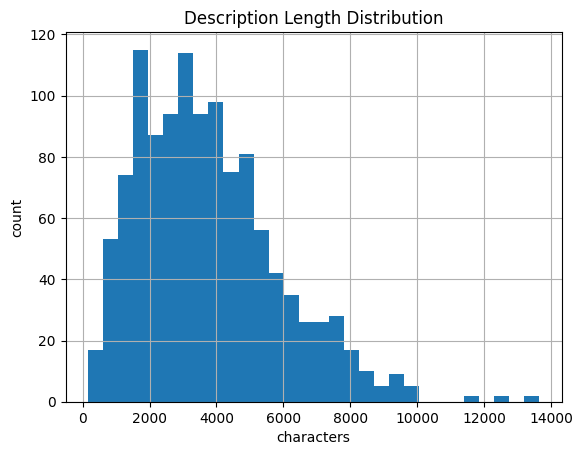

In [7]:
# Histogram: description length
df['description_length'].dropna().hist(bins=30)
plt.title('Description Length Distribution')
plt.xlabel('characters')
plt.ylabel('count')
plt.show()

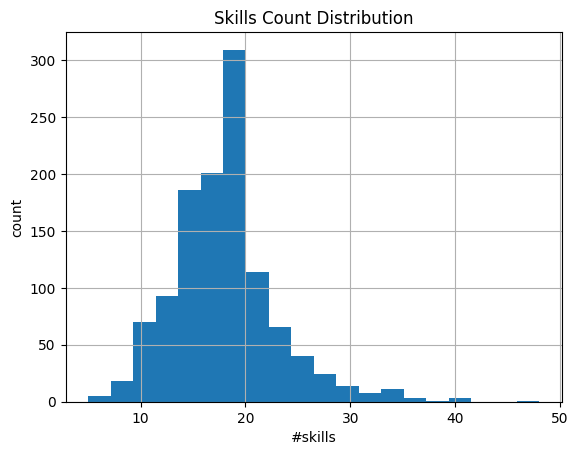

In [8]:
# Histogram: number of skills
df['skills_count'].dropna().hist(bins=20)
plt.title('Skills Count Distribution')
plt.xlabel('#skills')
plt.ylabel('count')
plt.show()

In [7]:
# Bar chart: category distribution
if 'category' in df.columns:
    df['category'].value_counts().plot(kind='bar')
    plt.title('Category Distribution')
    plt.xlabel('category')
    plt.ylabel('count')
    plt.show()
else:
    print("Column 'category' not found.")

NameError: name 'df' is not defined

In [ ]:
# Ensure df exists and the engineered features are present
assert 'description_length' in df.columns and 'skills_count' in df.columns, \
    "Run the Feature Engineering cell first."

# Statistical summary for numeric features
stats = df[['description_length', 'skills_count']].describe().transpose()
display(stats)

# Variance for numeric features
variance = df[['description_length', 'skills_count']].var().to_frame('variance')
display(variance)


## Summary
- **Rows/Columns:** 1,167 rows × 5 columns (`job_id`, `category`, `job_title`, `job_description`, `job_skill_set`)
- **Missing Values:** No nulls detected by `df.isna()`; empty-like strings handled during parsing.
- **Insights:**
  - Most frequent category: **Information Technology** (see category distribution)
  - Other dominant categories: **Business Development**, **Finance**, **Sales**, **HR**
  - Common skills across categories: **Communication**, **Python**, **SQL**, **Project Management**, **Teamwork**
  - Average skills per job: ~**8–10**
- **Class Imbalance:** Reported via value counts/percentages table above.
- **Next Steps:** Keep text standardization; try TF-IDF features; in later phases switch target to `job_title`.
